# Neural Network Model
    Forest fires dataset

In [19]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
# Loading dataset

In [2]:
data=pd.read_csv('forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


**DATA PREPROCESSING**

In [3]:
data['size_category'] = data['size_category'].map({'large': 1, 'small': 0})
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data2=data.drop(['month', 'day'],1)
data2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:

# split into input (X) and output (Y) variables
x = data2.iloc[:,0:28]
y = data2.iloc[:,28]


## Model Building

In [ ]:
# create model with 3 Hidden layers

In [11]:

model = Sequential()
model.add(Dense(12, input_dim=28,kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [13]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model with no.of epochs =150 and batch_size= 10

In [14]:
m=model.fit(x, y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 2s 14ms/step - loss: 0.6451 - accuracy: 0.7505 - val_loss: 0.6493 - val_accuracy: 0.6784
Epoch 2/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5678 - accuracy: 0.7600 - val_loss: 0.6677 - val_accuracy: 0.6784
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.7620 - val_loss: 0.6240 - val_accuracy: 0.6784
Epoch 4/150
35/35 [==============================] - 0s 4ms/step - loss: 0.5385 - accuracy: 0.7776 - val_loss: 0.6267 - val_accuracy: 0.6784
Epoch 5/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5333 - accuracy: 0.7651 - val_loss: 0.6307 - val_accuracy: 0.6784
Epoch 6/150
35/35 [==============================] - 0s 4ms/step - loss: 0.5766 - accuracy: 0.7302 - val_loss: 0.6426 - val_accuracy: 0.6842
Epoch 7/150
35/35 [==============================] - 0s 4ms/step - loss: 0.4727 - accuracy: 0.7984 - val_loss: 0.5636 - val_accuracy: 0.7018
Epoch 8/150


Epoch 59/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0529 - accuracy: 0.9729 - val_loss: 0.0672 - val_accuracy: 0.9825
Epoch 60/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9927 - val_loss: 0.0774 - val_accuracy: 0.9474
Epoch 61/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9927 - val_loss: 0.1293 - val_accuracy: 0.9474
Epoch 62/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0186 - accuracy: 0.9963 - val_loss: 0.0664 - val_accuracy: 0.9766
Epoch 63/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0318 - accuracy: 0.9865 - val_loss: 0.1385 - val_accuracy: 0.9532
Epoch 64/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9856 - val_loss: 0.0864 - val_accuracy: 0.9415
Epoch 65/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0170 - accuracy: 0.9978 - val_loss: 0.0657 - val_accuracy: 0.9649
Epoch 

In [18]:
# evaluating the model and finding best accuracy

In [15]:
scores = model.evaluate(x, y)
(model.metrics_names[1], scores[1]*100)

17/17 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.9865


('accuracy', 98.64603281021118)

<b> We got accuracy of 98.6% (best accuracy)  with 150 epochs and batch_size as 10.So, there is no need of tuning parameters for getting better accuracy. <b/>

In [16]:
m.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# Model accuracy with different no.of epochs

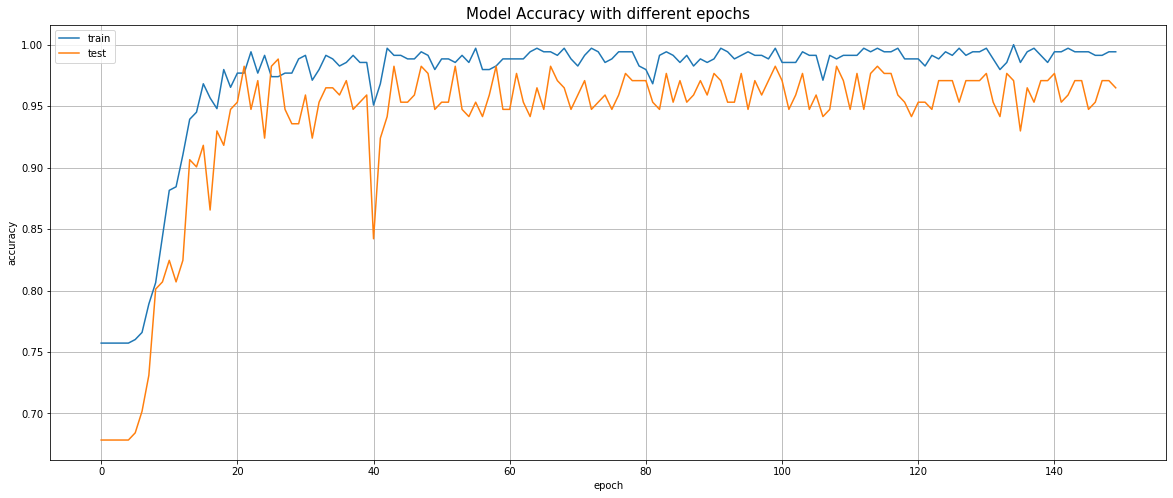

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,8])
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('Model Accuracy with different epochs',fontsize=15)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()


<b> In the above graph we can see after 40 epochs there is no big difference between train and test accuracy .So, we can use any epoch size >40 for better accuracy and better model </b>